## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single datase
merged_df = pd.merge(mouse_metadata, study_results, how= 'outer', on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merged_df[("Mouse ID")].nunique()

249

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Concatenate Mouse ID and Timepoint to identify duplicate Values
identify_duplicates= merged_df
identify_duplicates["ID concat Timepoint"] = identify_duplicates["Mouse ID"].astype(str) + identify_duplicates["Timepoint"].astype(str)

#Identify the Mouse ID/Timepoint pairs that are duplicated.Mouse g989 has ID/Timepoint duplicate values
duplicate_mouse = identify_duplicates[("ID concat Timepoint")].value_counts().loc[lambda x : x>1]
duplicate_mouse


g9895     2
g9890     2
g98920    2
g98915    2
g98910    2
Name: ID concat Timepoint, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mouse = merged_df[merged_df["Mouse ID"] == 'g989']
duplicate_mouse.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID concat Timepoint
908,g989,Propriva,Female,21,26,0,45.000000,0,g9890
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890
910,g989,Propriva,Female,21,26,5,48.786801,0,g9895
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895
912,g989,Propriva,Female,21,26,10,51.745156,0,g98910
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910
914,g989,Propriva,Female,21,26,15,51.325852,1,g98915
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915
916,g989,Propriva,Female,21,26,20,55.326122,1,g98920
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID(g989).
mouse_drop = merged_df[merged_df["Mouse ID"] == 'g989'].index
merged_df.drop(mouse_drop, inplace=True)

merged_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID concat Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = merged_df
cleaned_df[("Mouse ID")].nunique()

248

## Summary Statistics

In [9]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID concat Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimendcleaned_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
#perform calculations by drug regimen
drug_avg = cleaned_df.groupby("Drug Regimen").mean()
drug_median = cleaned_df.groupby("Drug Regimen").median()
drug_var = cleaned_df.groupby("Drug Regimen").var()
drug_std = cleaned_df.groupby("Drug Regimen").std()
drug_avg = cleaned_df.groupby("Drug Regimen").sem()


#Create Dataframe grouped by drug regimen
drug_stats = pd.DataFrame(drug_avg).reset_index()

 
# Assemble the resulting series into a single summary dataframe.

drug_stats["Mean Tumor Volume"]=drug_avg["Tumor Volume (mm3)"].values
drug_stats["Median Tumor Volume"]=drug_median["Tumor Volume (mm3)"].values
drug_stats["Tumor Volume Variance"]=drug_var["Tumor Volume (mm3)"].values
drug_stats["Tumor Volume Std Dev"]=drug_std["Tumor Volume (mm3)"].values
drug_stats["Tumor Volume Std Err"]=drug_median["Tumor Volume (mm3)"].values

drug_table=drug_stats
drug_table.drop(columns="Age_months", inplace=True)
drug_table.drop(columns="ID concat Timepoint", inplace=True)
drug_table.drop(columns="Metastatic Sites", inplace=True)
drug_table.drop(columns="Mouse ID", inplace=True)
drug_table.drop(columns="Sex", inplace=True)
drug_table.drop(columns="Timepoint", inplace=True)
drug_table.drop(columns="Tumor Volume (mm3)", inplace=True)
drug_table.drop(columns= "Weight (g)", inplace=True)
drug_table

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
0,Capomulin,0.329346,41.557809,24.947764,4.994774,41.557809
1,Ceftamin,0.469821,51.776157,39.290177,6.268188,51.776157
2,Infubinol,0.492236,51.820584,43.128684,6.567243,51.820584
3,Ketapril,0.603860,53.698743,68.553577,8.279709,53.698743
4,Naftisol,0.596466,52.509285,66.173479,8.134708,52.509285
5,Placebo,0.581331,52.288934,61.168083,7.821003,52.288934
6,Propriva,0.544332,50.446266,43.852013,6.622085,50.446266
7,Ramicane,0.320955,40.673236,23.486704,4.846308,40.673236
8,Stelasyn,0.573111,52.431737,59.450562,7.710419,52.431737
9,Zoniferol,0.516398,51.818479,48.533355,6.966589,51.818479


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats
# Using the aggregation method, produce the same summary statistics in a single line


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
0,Capomulin,0.329346,41.557809,24.947764,4.994774,41.557809
1,Ceftamin,0.469821,51.776157,39.290177,6.268188,51.776157
2,Infubinol,0.492236,51.820584,43.128684,6.567243,51.820584
3,Ketapril,0.603860,53.698743,68.553577,8.279709,53.698743
4,Naftisol,0.596466,52.509285,66.173479,8.134708,52.509285
5,Placebo,0.581331,52.288934,61.168083,7.821003,52.288934
6,Propriva,0.544332,50.446266,43.852013,6.622085,50.446266
7,Ramicane,0.320955,40.673236,23.486704,4.846308,40.673236
8,Stelasyn,0.573111,52.431737,59.450562,7.710419,52.431737
9,Zoniferol,0.516398,51.818479,48.533355,6.966589,51.818479


## Bar and Pie Charts

Text(0, 0.5, 'Number Unique Mice Tested')

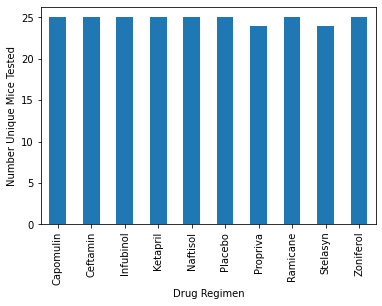

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_number = cleaned_df.groupby("Drug Regimen")
count_mice = drug_number["Mouse ID"].nunique()

count_chart = count_mice.plot(kind='bar')


count_chart.set_ylabel("Number Unique Mice Tested")

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

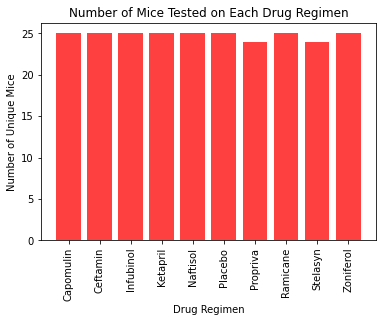

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_chart = cleaned_df.groupby("Drug Regimen").nunique()
x_axis = np.arange(0, len(drug_chart["Drug Regimen"]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo",
          "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]


plt.title("Number of Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

#plt.xlim(-0.75, len(["Drug Regimen"])-.25)
#plt.ylim(0, max(members) + 5)

plt.bar(x_axis, drug_chart["Mouse ID"], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, labels, rotation = 90)
#plt.show()
labels


In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#sex = cleaned_df.group_by("Sex")
#sex

sex_count = sex_df.groupby("Sex").nunique()
sex_count

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID concat Timepoint
Sex,,,,,,,,,,
Female,922,123,10,1,24,14,10,800,5,922
Male,958,125,10,1,24,14,10,834,5,958


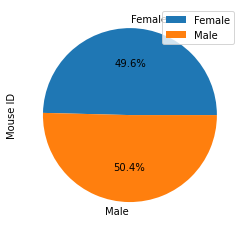

In [49]:
#PLOT unique mouse sex values using PANDAS
plot = sex_count.plot.pie(y='Mouse ID', autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1aa95c9f8d0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

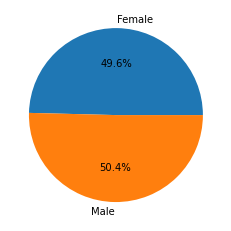

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count.set_index('Sex')
plt.pie(sex_count["Mouse ID"], autopct='%1.1f%%', labels = ["Female","Male"])

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
array = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments_df = cleaned_df.loc[cleaned_df['Drug Regimen'].isin(array)]

# Start by getting the last (greatest) timepoint for each mouse
last_time_df = treatments_df.groupby("Mouse ID").max()["Timepoint"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
analysis_df = pd.merge(last_time_df, treatments_df, on=("Mouse ID", "Timepoint"), how = "left")
analysis_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,ID concat Timepoint
0,a203,45,Infubinol,Female,20,23,67.973419,2,a20345
1,a251,45,Infubinol,Female,21,25,65.525743,1,a25145
2,a275,45,Ceftamin,Female,20,28,62.999356,3,a27545
3,a411,45,Ramicane,Male,3,22,38.407618,1,a41145
4,a444,45,Ramicane,Female,10,25,43.047543,0,a44445
...,...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4,y76945
96,y793,45,Capomulin,Male,17,17,31.896238,2,y79345
97,y865,45,Ceftamin,Male,23,26,64.729837,3,y86545
98,z578,45,Ramicane,Male,11,16,30.638696,0,z57845


In [94]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    #treatments.append(analysis_df["Drug Regimen"])
    #final_tumor_volumes.append(analysis_df["Tumor Volume (mm3)"])
   
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#analysis_group = analysis_df.groupby('Drug Regimen')
#analysis_group.head()

[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
